In [34]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting

reload(lattice)
reload(hamiltonian)
reload(plotting)



<module 'tblib.plotting' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\plotting.py'>

# Normal state Hamiltonian

- see the bandstructure and DOS of the Normal state Hamiltonian
- 3D plot of bandstructure
- test of derivative of hamiltonian entries over k

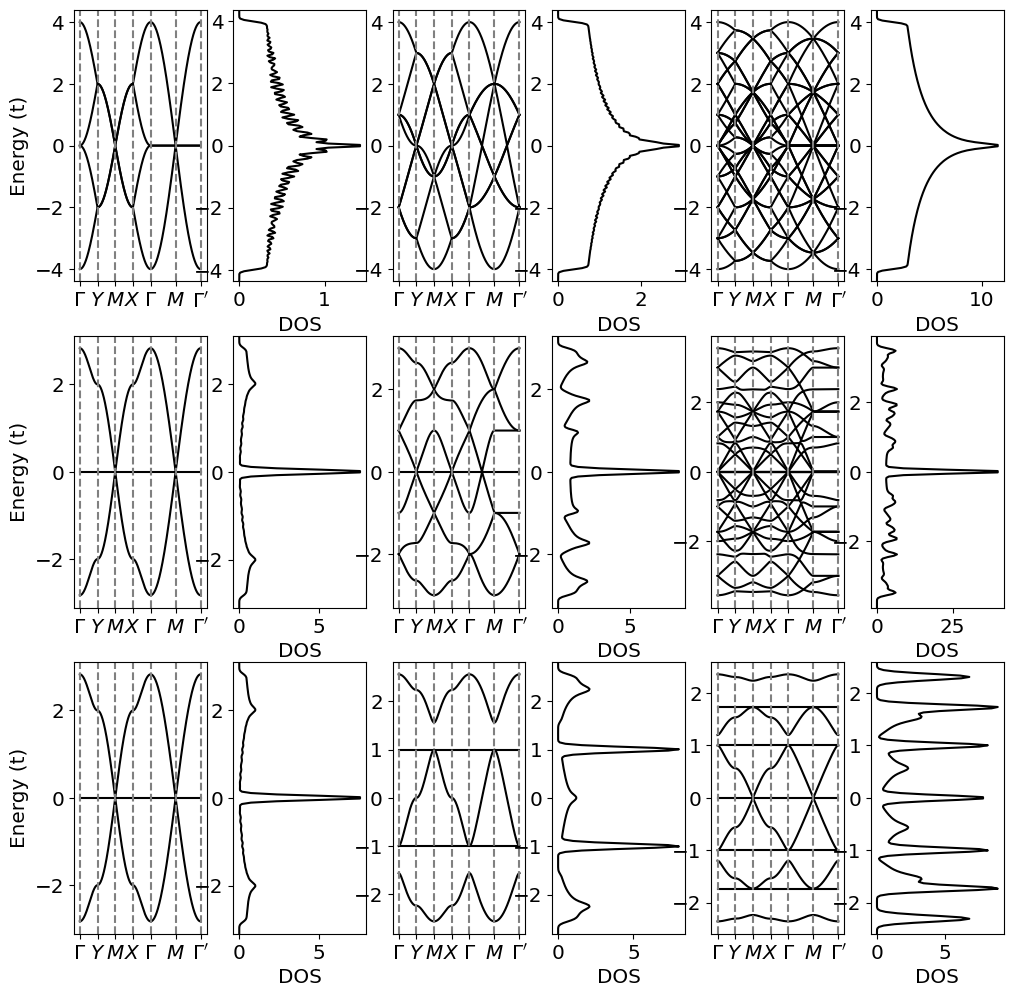

In [2]:
# Runtime: ~2 minutes

# Create model instances
models_3 = [
    hamiltonian.DSLmodel(N=2),
    hamiltonian.dDSLmodel(N=2),
    hamiltonian.LiebNmodel(N=2),
    ]

models_4 = [
    hamiltonian.DSLmodel(N=3),
    hamiltonian.dDSLmodel(N=3),
    hamiltonian.LiebNmodel(N=3),
    ]

models_6 = [
    hamiltonian.DSLmodel(N=6),
    hamiltonian.dDSLmodel(N=6),
    hamiltonian.LiebNmodel(N=6),
    ]

# Define Figure
fig, axes = plt.subplots(len(models_3),6,figsize=(12,4*len(models_3)))

nk_dos = 30

for i, model in enumerate(models_3):
    N = 2
    H0 = models_3[i].get_H0()
    axes[i, 0] = plotting.plot_bands(H0, s=(N,N), nk=500, hsp_path='GYMXGMH', ax=axes[i, 0]);
    axes[i, 1] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 0].get_ylim(), ax=axes[i, 1], ylabel=None);

for i, model in enumerate(models_4):
    N = 3
    H0 = models_4[i].get_H0()
    axes[i, 2] = plotting.plot_bands(H0, s=(N,N), nk=500, hsp_path='GYMXGMH', ax=axes[i, 2], ylabel=None);
    axes[i, 3] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 2].get_ylim(), ax=axes[i, 3], ylabel=None);

for i, model in enumerate(models_6):
    N = 6
    H0 = models_6[i].get_H0()
    axes[i, 4] = plotting.plot_bands(H0, s=(N,N), nk=500, hsp_path='GYMXGMH', ax=axes[i, 4], ylabel=None);
    axes[i, 5] = plotting.plot_DOS(H0, nk=nk_dos, s=(N,N), elim=axes[i, 4].get_ylim(), ax=axes[i, 5], ylabel=None);

In [35]:
# Create an instance of the diagonally striped lattice
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.dDSLmodel(N=N)
H = ham.get_kinH()

In [36]:
np.linalg.eigh(H(np.pi, np.pi))

(array([-2.00000000e+00, -2.25514052e-16,  2.00000000e+00]),
 array([[-5.00000000e-01+0.00000000e+00j, -7.07106781e-01+0.00000000e+00j,
          5.00000000e-01+0.00000000e+00j],
        [-5.00000000e-01-8.32667268e-17j,  7.07106781e-01+0.00000000e+00j,
          5.00000000e-01+2.77555756e-17j],
        [ 5.00000000e-01+5.00000000e-01j, -5.55111512e-17-1.11022302e-16j,
          5.00000000e-01+5.00000000e-01j]]))

In [37]:
H(np.pi,np.pi)

array([[0.+0.j, 0.+0.j, 1.-1.j],
       [0.+0.j, 0.+0.j, 1.-1.j],
       [1.+1.j, 1.+1.j, 0.+0.j]])

In [28]:
site = ham.lat.map_sites[0]
nn = ham.lat.map_sites[1]
print(nn, site)

(1, 0) (0, 1)


In [25]:
R = np.stack(ham.lat.nn[(0,1)][(0,0)]).T
R

array([[0, 0],
       [1, 0]])

In [27]:
drkx, drky = -1j * ham.lat.mapback(np.asarray(nn) - np.asarray(site))
drkx

-1j

In [ ]:
dRkx, dRky = -1j * R

In [ ]:
site = self.lat.map_sites[j]
        nn = self.lat.map_sites[i]
        R = np.stack(self.lat.nn[site][nn]).T
        drkx, drky = -1j * self.lat.mapback(np.asarray(nn) - np.asarray(site))
        f0 =  (drkx**dnx) * (drky**dny) *  np.exp(drkx * k[0] + drky * k[1])
        dRkx, dRky = -1j * R/N
        farr = (dRkx**dnx) * (dRky**dny) * np.exp(dRkx * k[0] + dRky * k[1])

AttributeError: module 'tblib.hamiltonian' has no attribute 'get_hopping'

c:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\tests\..\tblib\lattice.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  ax.scatter(*sites.T, c='k' if field is None else field, cmap=cmap, vmin=0, vmax=2)


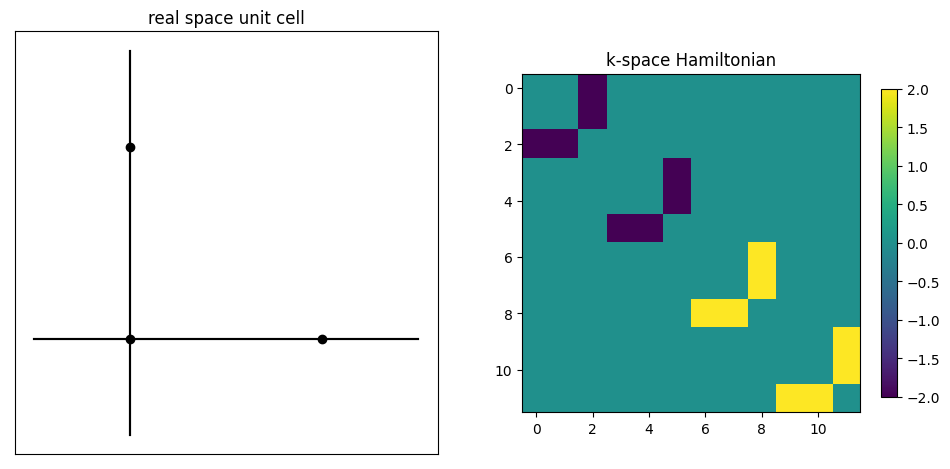

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].set_title('real space unit cell')
axes[1].set_title('k-space Hamiltonian')
axes[0] = lat.plot_nn(ax=axes[0])
ax2 = axes[1].imshow(np.real(H(np.pi,np.pi)))
fig.colorbar(ax2, shrink=0.5)
plt.show()

In [ ]:
k=np.linspace(0,2*np.pi,41)
E2 = np.zeros((ham.dim,41*41))
c = 0
for kx in k:
    for ky in k:
        E2[:,c] = np.linalg.eigh(H(kx,ky))[0]
        c+=1


s1=np.shape(E2)[0]
#E2=E2.reshape(ham.dim,41,41)


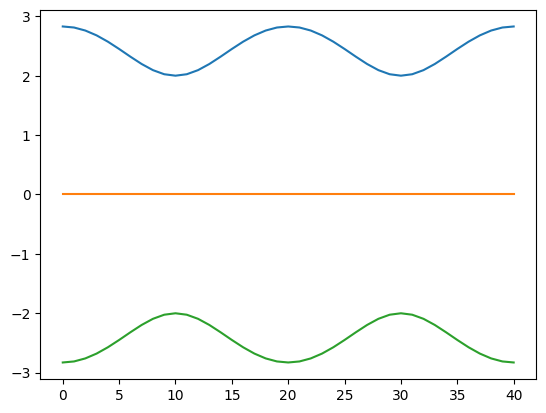

In [ ]:
plt.plot(E2[8, 20*41:21*41])
plt.plot(E2[7, 20*41:21*41])
plt.plot(E2[0, 20*41:21*41])

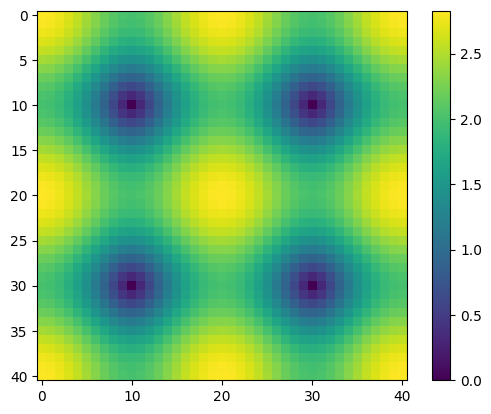

In [ ]:
plt.imshow(E2[8,:,:])
plt.colorbar()

In [ ]:
x = np.outer(np.linspace(0, 2*np.pi, 41), np.ones(41))
y = x.copy().T
np.shape(E2)


(12, 41, 41)

In [ ]:
xticks = [0, np.pi, 2*np.pi]
xlabels = [0,r'$\pi$', r'$2\pi$']
#xticks = [0,1/2*np.pi, np.pi]
#xlabels = [0,r'$\frac{1}{2}\pi$', r'$\pi$']

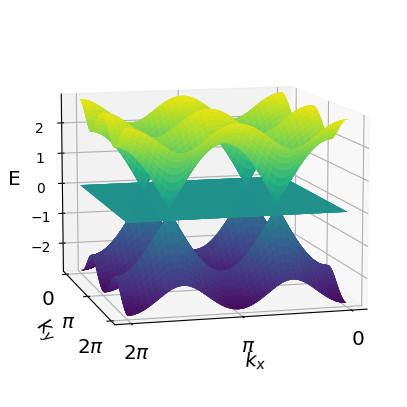

In [ ]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$k_x$', size='x-large')
ax.set_ylabel(r'$k_y$', size='x-large')
ax.set_zlabel(r'E', size='x-large')
ax.set_xticks(ticks=xticks, labels= xlabels, size='x-large')
ax.set_yticks(ticks=xticks, labels=xlabels, size='x-large')


for i in E2:
    surf = ax.plot_surface(x,y, i, vmin=-3, vmax=3, cmap='viridis')
#surf = ax.plot_surface(x,y, E2, vmin=-3, vmax=3, cmap='viridis')
#fig.colorbar(surf)
ax.view_init(elev=10, azim=75, roll=0)
plt.show()

In [ ]:
Hli = []
dHli = []
spinupH = []
k = np.linspace(0,2*np.pi, 100)
dH = ham.get_HBdG(1,0)
sH = ham.get_reducedH()
for x in k:
    Hli.append(H(x,0)[0,2])
    dHli.append(dH(x,0)[0,2])
    spinupH.append(sH(x,0)[3,5])


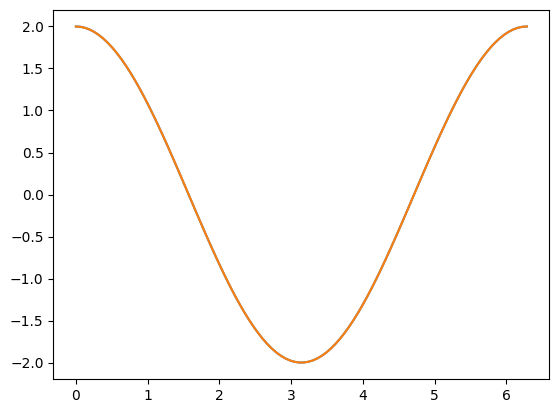

In [ ]:
plt.plot(k, Hli)
plt.plot(k, dHli)
#plt.plot(k, spinupH)